<a href="https://colab.research.google.com/github/emily-indrakusuma/KMeanswithMinMax/blob/main/Preprocessing_and_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans


Preprocessing

In [116]:
df = pd.read_csv("customersegmentation.csv")
df.head()

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
0,1,1500000,15,100000
1,2,750000,2,150000
2,3,15000,1,5000
3,4,225000,5,0
4,5,690000,7,8000


In [117]:
df.describe()

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
count,10.00000,1.000000e+01,10.000000,10.000000
mean,5.50000,1.005267e+08,125.600000,60300.000000
std,3.02765,3.160430e+08,377.532692,69982.616889
min,1.00000,1.500000e+04,1.000000,0.000000
25%,3.25000,2.687500e+05,2.500000,5750.000000
50%,5.50000,5.950000e+05,6.000000,32500.000000
75%,7.75000,9.375000e+05,11.000000,93750.000000
max,10.00000,1.000000e+09,1200.000000,200000.000000


In [118]:
df.isna().sum()

Customer                       0
Total Amount                   0
Total Number of Transaction    0
Total Discount Amount          0
dtype: int64

In [119]:
df.head()

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
0,1,1500000,15,100000
1,2,750000,2,150000
2,3,15000,1,5000
3,4,225000,5,0
4,5,690000,7,8000


In [120]:
x=df.iloc[:,[0,1,2]].values
x

array([[         1,    1500000,         15],
       [         2,     750000,          2],
       [         3,      15000,          1],
       [         4,     225000,          5],
       [         5,     690000,          7],
       [         6,     400000,          2],
       [         7,     187000,          8],
       [         8,     500000,         12],
       [         9,    1000000,          4],
       [        10, 1000000000,       1200]])

In [121]:
y = df.iloc[:,3].values
y

array([100000, 150000,   5000,      0,   8000,  25000,  40000,  75000,
       200000,      0])

In [122]:
d = preprocessing.normalize(df)
d

array([[6.65190105e-07, 9.97785158e-01, 9.97785158e-06, 6.65190105e-02],
       [2.61488180e-06, 9.80580676e-01, 2.61488180e-06, 1.96116135e-01],
       [1.89736656e-04, 9.48683279e-01, 6.32455519e-05, 3.16227760e-01],
       [1.77777778e-05, 1.00000000e+00, 2.22222222e-05, 0.00000000e+00],
       [7.24588981e-06, 9.99932794e-01, 1.01442457e-05, 1.15934237e-02],
       [1.49707887e-05, 9.98052578e-01, 4.99026289e-06, 6.23782861e-02],
       [3.66050915e-05, 9.77878874e-01, 4.18343903e-05, 2.09171952e-01],
       [1.58229816e-05, 9.88936352e-01, 2.37344725e-05, 1.48340453e-01],
       [8.82522608e-06, 9.80580676e-01, 3.92232270e-06, 1.96116135e-01],
       [1.00000000e-08, 1.00000000e+00, 1.20000000e-06, 0.00000000e+00]])

In [123]:
for i in df[['Total Amount','Total Number of Transaction','Total Discount Amount']].columns:
    df[i] = (df[i] - df[i].min()) / (df[i].max() - df[i].min())    


In [124]:
df.head(10)

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount
0,1,0.001485,0.011676,0.500
1,2,0.000735,0.000834,0.750
2,3,0.000000,0.000000,0.025
3,4,0.000210,0.003336,0.000
4,5,0.000675,0.005004,0.040
5,6,0.000385,0.000834,0.125
6,7,0.000172,0.005838,0.200
7,8,0.000485,0.009174,0.375
8,9,0.000985,0.002502,1.000
9,10,1.000000,1.000000,0.000


# **K-Means with 3 Centroid and 2 Iterations**

In [125]:
k = 3 
# rows = df.shape[0] 
# cols = df.shape[1] 

centroids = df.loc[[0,2,7],:] 

In [126]:
print(centroids)

   Customer  Total Amount  Total Number of Transaction  Total Discount Amount
0         1      0.001485                     0.011676                  0.500
2         3      0.000000                     0.000000                  0.025
7         8      0.000485                     0.009174                  0.375


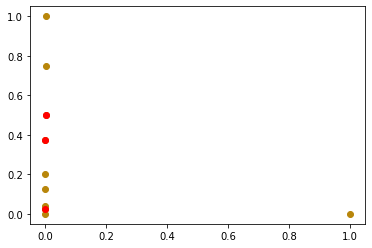

In [127]:
plt.scatter(df["Total Amount"],df["Total Discount Amount"],c='darkgoldenrod')
plt.scatter(centroids["Total Amount"],centroids["Total Discount Amount"],c='red')
plt.show()

   Customer  Cluster         1         2         3
0         1        1  0.000000  0.475002  0.125004
1         2        1  0.250001  0.725000  0.375000
2         3        2  0.475002  0.000000  0.350000
3         4        2  0.500002  0.025001  0.375000
4         5        2  0.460001  0.015015  0.335000
5         6        2  0.375002  0.100001  0.250000
6         7        2  0.300003  0.175000  0.175000
7         8        3  0.125004  0.350000  0.000000
8         9        1  0.500000  0.975000  0.625000
9        10        2  1.116706  1.000312  1.067546


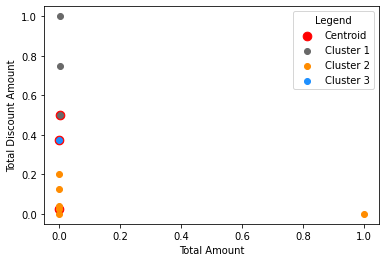

         Total Discount Amount  Total Number of Transaction  Total Amount
Cluster                                                                  
1                        0.750                     0.005004      0.001068
2                        0.065                     0.169169      0.166907
3                        0.375                     0.009174      0.000485
   Customer  Cluster         1         2         3
0         1        3  0.250000  0.465392  0.125004
1         2        1  0.000333  0.704867  0.375000
2         3        2  0.725001  0.171633  0.350000
3         4        2  0.750000  0.178921  0.375000
4         5        2  0.710000  0.168101  0.335000
5         6        2  0.625000  0.177002  0.250000
6         7        3  0.550001  0.214536  0.175000
7         8        3  0.375000  0.351847  0.000000
8         9        1  0.250000  0.949608  0.625000
9        10        2  1.249145  0.835625  1.067546


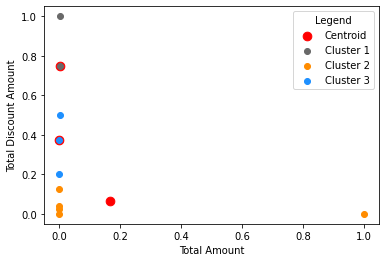

         Total Discount Amount  Total Number of Transaction  Total Amount
Cluster                                                                  
1                     0.875000                     0.001668      0.000860
2                     0.038000                     0.201835      0.200254
3                     0.358333                     0.008896      0.000714


In [128]:
diff = 1
val=0

for y in range(0,2):
    targetData=df
    i=1
    for index1,row_c in centroids.iterrows():
        ED=[]
        for index2,row_d in targetData.iterrows():
            d1=(row_c["Total Amount"]-row_d["Total Amount"])**2
            d2=(row_c["Total Discount Amount"]-row_d["Total Discount Amount"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        df[i]=ED
        i=i+1  
    C=[]
    for index,row in df.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(k):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    df["Cluster"]=C
    
    print(df[['Customer','Cluster',1,2,3]])

    color=['dimgray','darkorange','dodgerblue']
    clusters = ['Centroid','Cluster 1', 'Cluster 2', 'Cluster 3']
    plt.scatter(centroids["Total Amount"],centroids["Total Discount Amount"],c='red',s=75)
    for K in range(k):
      data=df[df["Cluster"]==K+1]
      plt.scatter(data["Total Amount"],data["Total Discount Amount"],c=color[K])
    plt.xlabel('Total Amount')
    plt.ylabel('Total Discount Amount')
    plt.legend(labels=clusters,
           title="Legend")

    plt.show()
    
    
    centroids_new = df.groupby(["Cluster"]).mean()[["Total Discount Amount","Total Number of Transaction","Total Amount"]]
     
    centroids = df.groupby(["Cluster"]).mean()[["Total Discount Amount","Total Number of Transaction","Total Amount"]]

    print (centroids_new)

In [129]:
df.head(10)

,Customer,Total Amount,Total Number of Transaction,Total Discount Amount,1,2,3,Cluster
0,1,0.001485,0.011676,0.500,0.250000,0.465392,0.125004,3
1,2,0.000735,0.000834,0.750,0.000333,0.704867,0.375000,1
2,3,0.000000,0.000000,0.025,0.725001,0.171633,0.350000,2
3,4,0.000210,0.003336,0.000,0.750000,0.178921,0.375000,2
4,5,0.000675,0.005004,0.040,0.710000,0.168101,0.335000,2
5,6,0.000385,0.000834,0.125,0.625000,0.177002,0.250000,2
6,7,0.000172,0.005838,0.200,0.550001,0.214536,0.175000,3
7,8,0.000485,0.009174,0.375,0.375000,0.351847,0.000000,3
8,9,0.000985,0.002502,1.000,0.250000,0.949608,0.625000,1
9,10,1.000000,1.000000,0.000,1.249145,0.835625,1.067546,2
